#Google Colaboratory で自然言語処理

※Google Colaboratoryで実行されることを想定しています.<br>
[Google Colaborator](https://colab.research.google.com/)

## 内容
Google Colaboratory環境で簡単な自然言語処理を扱う
- MeCabを使用した形態素解析
- MeCabで追加のシステム辞書を使う
- Word2vecを動かす

## Google Colaboratory について
Google Colaboratoryの[チュートリアル](https://colab.research.google.com/notebooks/welcome.ipynb?hl=ja)<br>
クラウド上で動くJupyter notebook 環境です．<br>
OSはUbuntuです．詳しい環境は下のセルを実行すると見えます．<br>
コードのセルにはPythonコードを書くことができますが，行の頭に"!"もしくは，"%%bash"以下の行ではBashを書くこともできます．

In [13]:
%%bash
apt install screenfetch
screenfetch

Reading package lists...
Building dependency tree...
Reading state information...
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  bc giblib1 libid3tag0 libimlib2 scrot
The following NEW packages will be installed:
  bc giblib1 libid3tag0 libimlib2 screenfetch scrot
0 upgraded, 6 newly installed, 0 to remove and 16 not upgraded.
Need to get 375 kB of archives.
After this operation, 1,280 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 bc amd64 1.07.1-2 [86.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libid3tag0 amd64 0.15.1b-13 [31.2 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libimlib2 amd64 1.4.10-1 [173 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 giblib1 amd64 1.2.4-11 [17.5 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/univers



awk: cannot open /proc/fb (No such file or directory)


## 自然言語処理を行うにあたっての環境構築

 ### MeCabの導入
 [MeCab](https://taku910.github.io/mecab/) \[1]<br>
 MeCabは形態素解析器です．<br>
 形態素解析では，自然言語の文を形態素（ほとんど単語だけど単語より小さい単位）に分割したり，それぞれの形態素の品詞を特定したりします．

In [1]:
%%bash
apt install mecab libmecab-dev mecab-ipadic-utf8
#下はPython上でMeCabを動かすライブラリ
pip install mecab-python3

Reading package lists...
Building dependency tree...
Reading state information...
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
0 upgraded, 8 newly installed, 0 to remove and 16 not upgraded.
Need to get 29.0 MB of archives.
After this operation, 277 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab2 amd64 0.996-5 [257 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab-dev amd64 0.996-5 [308 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-utils amd64 0.996-5 [4,856 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic/un

### mecab-ipadic-NEologdの導入
[mecab-ipadic-NEologd](https://github.com/neologd/mecab-ipadic-neologd/blob/master/README.ja.md)<br>
MeCabの標準のシステム辞書を使用した形態素解析では，辞書の語彙不足に起因した正しく分割できない固有表現などが存在するため，多数のWeb嬢の言語資源から得た新語を追加したmecab-ipadic-NEologdを使用する．

In [2]:
%%bash
apt install file
git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git
cd mecab-ipadic-neologd && ./bin/install-mecab-ipadic-neologd -n -a -y

Reading package lists...
Building dependency tree...
Reading state information...
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libmagic-mgc libmagic1
The following NEW packages will be installed:
  file libmagic-mgc libmagic1
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 275 kB of archives.
After this operation, 5,294 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2ubuntu0.3 [184 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic1 amd64 1:5.32-2ubuntu0.3 [68.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 file amd64 1:5.32-2ubuntu0.3 [22.1 kB]
Fetched 275 kB in 1s (434 kB/s)
Selecting previously unselected package libmagic-mgc.
(Reading database ... 134663 files and directories cu



Cloning into 'mecab-ipadic-neologd'...
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11.6M  100 11.6M    0     0  1330k      0  0:00:08  0:00:08 --:--:-- 2445k
./../../libexec/iconv_euc_to_utf8.sh ./Noun.demonst.csv 
./../../libexec/iconv_euc_to_utf8.sh ./Noun.nai.csv 
./../../libexec/iconv_euc_to_utf8.sh ./Noun.proper.csv 
./../../libexec/iconv_euc_to_utf8.sh ./Interjection.csv 
./../../libexec/iconv_euc_to_utf8.sh ./Noun.adverbal.csv 
./../../libexec/iconv_euc_to_utf8.sh ./Noun.place.csv 
./../../libexec/iconv_euc_to_utf8.sh ./Prefix.csv 
./../../libexec/iconv_euc_to_utf8.sh ./Adverb.csv 
./../../libexec/iconv_euc_to_utf8.sh ./Noun.number.csv 
./../../libexec/iconv_euc_to_utf8.sh ./Noun.adjv.csv 
./../../libexec/iconv_euc_to_utf8.sh ./Adnominal.csv 
./../../libexec/iconv_euc_to_utf8.sh ./Co

## Word2vec学習済みモデルのダウンロード
Word2vec[2] <br>
[日本語 Wikipedia エンティティベクトル](http://www.cl.ecei.tohoku.ac.jp/~m-suzuki/jawiki_vector/)\[3]<br>
「日本語 Wikipedia エンティティベクトル」は、日本語版 Wikipedia の本文全文から学習した、単語、および Wikipedia で記事となっているエンティティの分散表現ベクトルです。Wikipedia の記事本文の抽出には WikiExtractor を、単語分割には MeCab を、単語ベクトルの学習には word2vec をそれぞれ用いています。\[3]

In [3]:
!curl -L -O https://github.com/singletongue/WikiEntVec/releases/download/20190520/jawiki.all_vectors.100d.txt.bz2 && bunzip2 jawiki.all_vectors.100d.txt.bz2

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   622    0   622    0     0   4411      0 --:--:-- --:--:-- --:--:--  4411
100  598M  100  598M    0     0  55.4M      0  0:00:10  0:00:10 --:--:-- 51.1M


## matplotlibでグラフを作成する際に，日本語で文字化けが起らないようにする
import japanize-matplotlibするだけで日本語表示ができるようになる

In [4]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 2.9MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.0.5-cp36-none-any.whl size=4118721 sha256=e8575a97d720e531238033c2f6ea1ab7225e2d4833c8b7a50c9a2dd7fcde2128
  Stored in directory: /root/.cache/pip/wheels/6c/8a/08/4a784957da9f3c2b4839b4986be2fba2a481877318948be52c
Successfully built japanize-matplotlib


#環境構築終わり
以下python

In [0]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import japanize_matplotlib
import gensim

In [6]:
#Word2vecのモデルの読み込み
model = gensim.models.KeyedVectors.load_word2vec_format("jawiki.all_vectors.100d.txt")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [7]:
#単語からベクトルの取り出し
print(model["日本"])

[ 5.30889511e-01 -2.57213235e-01 -1.59220584e-02 -4.43872392e-01
  2.71221787e-01 -1.47873849e-01 -1.60650671e-01  3.76813039e-02
  2.01499194e-01 -2.68208683e-02  2.56034791e-01 -3.11926872e-01
  9.89468396e-02  6.42983854e-01 -1.48453295e-01  2.68574059e-01
 -3.14776182e-01  1.63276732e-01 -4.87488359e-02 -2.80927867e-01
  1.43521684e-04  7.68588781e-02 -5.53616993e-02 -2.08212003e-01
  2.86783755e-01  3.41469854e-01 -1.54067263e-01 -2.12375090e-01
 -5.23720384e-01  1.69052696e-03  2.17034683e-01 -4.36213195e-01
  5.40924780e-02 -6.58204496e-01 -9.03449208e-02 -4.66142148e-01
 -2.65461095e-02  1.01459041e-01 -1.25326768e-01 -3.69417846e-01
 -3.86606038e-01  2.01364979e-01 -2.10095160e-02  1.05791129e-01
  8.69495720e-02 -1.50322765e-01  3.10459822e-01 -2.49653801e-01
  2.40822718e-01 -8.23203623e-02 -1.70377642e-01  2.89304972e-01
 -1.04047254e-01 -5.41331209e-02 -2.01893136e-01 -3.96439135e-02
  3.69843423e-01 -1.44937128e-01 -4.12835479e-01 -5.29332459e-02
 -1.45312948e-02  1.45022

In [0]:
words = ["キャッシュレス", "Suica", "クレジットカード", "自動車", "バドミントン", "数学", "神経", "電車"]
vectors = [model[word] for word in words]

In [0]:
#PCA
pca = PCA(2)
pca.fit(vectors)
vec_pca = pca.transform(vectors)

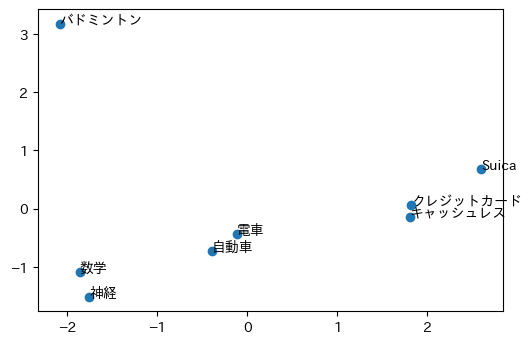

In [10]:
plt.figure(dpi=100)
plt.scatter(vec_pca[:,0],vec_pca[:,1])
for word,vec in zip(words,vec_pca):
  plt.annotate(word,(vec[0],vec[1]))
plt.show()

#おまけ：PythonからNEologd辞書を使用したMeCabの分かち書き

In [0]:
import MeCab

In [12]:
sentence = "あめんぼあかいなあいうえお"

#引数はシステム辞書にNEologd辞書を使用してねということ
m = MeCab.Tagger("-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd")

print("これはそのまま出力\n-----")
print(m.parse(sentence))

print("\n1行毎に分ける\n-----")
for word in m.parse(sentence).splitlines():
  if word != "EOS":
    print(word)
  
print("\n色々取り出す\n-----")
for word in m.parse(sentence).splitlines():
  if word != "EOS":
    print("単語: {}".format(word.split("\t")[0]))
    print("品詞: {}".format(word.split("\t")[1].split(",")[0]))

これはそのまま出力
-----
あめんぼ	名詞,一般,*,*,*,*,あめんぼ,アメンボ,アメンボ
あかい	形容詞,自立,*,*,形容詞・アウオ段,基本形,あかい,アカイ,アカイ
な	助詞,終助詞,*,*,*,*,な,ナ,ナ
あいうえお	名詞,固有名詞,人名,一般,*,*,あいうえお,アイウエオ,アイウエオ
EOS


1行毎に分ける
-----
あめんぼ	名詞,一般,*,*,*,*,あめんぼ,アメンボ,アメンボ
あかい	形容詞,自立,*,*,形容詞・アウオ段,基本形,あかい,アカイ,アカイ
な	助詞,終助詞,*,*,*,*,な,ナ,ナ
あいうえお	名詞,固有名詞,人名,一般,*,*,あいうえお,アイウエオ,アイウエオ

色々取り出す
-----
単語: あめんぼ
品詞: 名詞
単語: あかい
品詞: 形容詞
単語: な
品詞: 助詞
単語: あいうえお
品詞: 名詞


## 参考文献
- \[1] [Taku Kudo, Kaoru Yamamoto and Yuji Matsumoto. Applying Conditional Random Fields to Japanese Morphological Analysis, *Proc. 2004 Conference on Empirical Methods in Natural Language Processing (EMNLP-2004)*, pp.230-237. (2004)](https://www.aclweb.org/anthology/W04-3230.pdf)
- \[2] [Tomas Mikolov, Kai Chen, Greg Corrado and Jeffrey Dean. Efficient Estimation of Word Representations in Vector Space, International Conference on Learning Representations. (2013)](https://arxiv.org/abs/1301.3781)
- \[3] [鈴木 正敏, 松田 耕史, 関根 聡, 岡崎 直観, 乾 健太郎. Wikipedia記事に対する拡張固有表現ラベルの多重付与, 言語処理学会第22回年次大会, pp.A5-2. (2016)](https://www.anlp.jp/proceedings/annual_meeting/2016/pdf_dir/A5-2.pdf)